<font color='red' size=5><b> Software Requirements: The below scripts are tested in Python version 3.6.1 and Seaborn version 0.7.1</b> </font><br>   
 
# <font color='blue'>Titanic: Machine Learning from Disaster: Predict survival on the Titanic</font> <br>
# <font color='blue'> Important Instructions </font>
## <font color='blue'> Setup Working directory, copy files, execute scripts </font>
<font color='blue'> <br>
1) Copy input CSV file from the Data directory into your home/working directory <br>
2) Copy this ipython (ipynb) notebook from the Notebooks folder into your home/working directory <br>
3) Ensure that the CSV files and this ipython notebook (ipynb) are in the home/working directory <br>
4) Execute below scripts by sequence order </font> <br>

In [1]:
#Check the python and seaborn version
from platform import python_version
import seaborn as sns

print(python_version())
print(sns.__version__)

3.6.1
0.7.1


In [2]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import os
import glob
import itertools
from sklearn.preprocessing import MinMaxScaler
from matplotlib import *
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_mldata
from sklearn.feature_selection import RFE
from sklearn import metrics
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import KFold
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error,roc_auc_score ,roc_curve,auc
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split,StratifiedKFold
from scipy.stats import uniform, randint
import xgboost as xgb
from sklearn.pipeline import make_pipeline

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Print the plot within the page
%matplotlib inline

In [5]:
# set seaborn theme if you prefer
sns.set_style('whitegrid')

# Problem Statement

### The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

### One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
 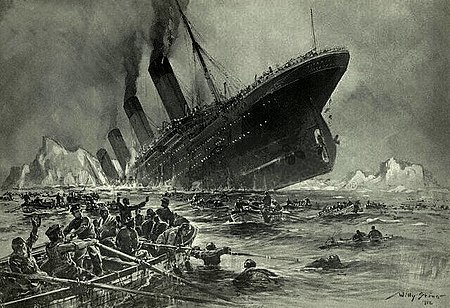



# Goal

### Predict  what sorts of people were likely to survive


### -----------------------------------------------------------------------------------------------------------------------------------



# EDA - Exploratory Data Analysis 

## On this part of the exploration, we will import dataset and explore variables that will have influence on the prediction. 

### Step 1: Importing, cleaning and Imputing Data

### Import datasets, perform analysis 

In [6]:
# read data
df_titanic_train_data = pd.read_csv("./titanic/train.csv")
#Look at the data frame to review top rows
df_titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#Understand the rows and columns of the dataframe
df_titanic_train_data.shape

(891, 12)

In [8]:
#Lets check the datatypes of the dataframe
df_titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
#Lookup up the summary
df_titanic_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
#Load the test data and check the top few rows
df_titanic_test_data = pd.read_csv("./titanic/test.csv")
df_titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [11]:
#Check for the rows and columns
df_titanic_test_data.shape

(418, 11)

In [12]:
# Inspecting the percentages of Null values of the train dataframe
round(100*(df_titanic_train_data.isnull().sum()/len(df_titanic_train_data.index)), 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

<font color='blue'>

<b>There are several variables which are having missing values. We need to handle each variables differently based on % of missing values and business objective. The columns contains high missing values can be dropped as it will not add value to use those variables</b>

</font>

In [13]:
# Inspecting the percentages of Null values for the test dataframe
round(100*(df_titanic_test_data.isnull().sum()/len(df_titanic_test_data.index)), 2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

<font color='blue'>

<b>There are several variables which are having missing values. We need to handle each variables differently based on % of missing values and business objective. The columns contains high missing values can be dropped as it will not add value to use those variables</b>

</font>

In [14]:
#Check for columns in the dataframe
df_titanic_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
#Check for columns in the dataframe for the test dataframe
df_titanic_test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Step 2: Univariate Analysis

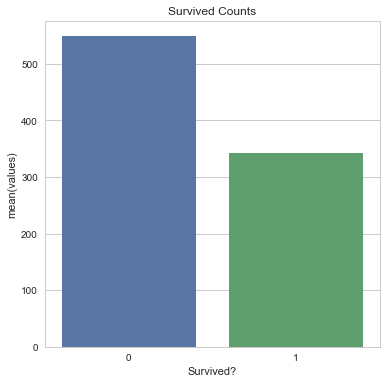

In [16]:
#get the Survived value count
Survived = df_titanic_train_data["Survived"].value_counts()
#create dataframe for the Survived variable
df_Survived = pd.DataFrame({'Survived?': Survived.index,
                   'values': Survived.values
                  })
#plot the graph
plt.figure(figsize = (6,6))
plt.title('Survived Counts')
sns.set_color_codes('dark')
#Let draw using bar chart to compare the values
sns.barplot(x = 'Survived?', y='values', data=df_Survived)
locs, labels = plt.xticks()
plt.show()

<font color='blue'>

<b>We can see that the number of passengers survived is less than those who did not survive </b>

</font>

In [17]:
#Let us impute the missing value for the Age variable with the mean value
df_titanic_train_data['Age'].fillna((round(df_titanic_train_data['Age'].mean(),0)),inplace=True)
df_titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
#Perform the same imputation for the test dataframe
df_titanic_test_data['Age'].fillna((round(df_titanic_test_data['Age'].mean(),0)), inplace=True)
df_titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
#remove the variable which has more than 70% missing values
pct_null = df_titanic_train_data.isnull().sum() / len(df_titanic_train_data)
missing_features = pct_null[pct_null > 0.70].index
df_titanic_train_data.drop(missing_features, axis=1, inplace=True)

In [20]:
#remove the variable which has more than 70% missing values
pct_null = df_titanic_test_data.isnull().sum() / len(df_titanic_test_data)
missing_features = pct_null[pct_null > 0.70].index
df_titanic_test_data.drop(missing_features, axis=1, inplace=True)

In [21]:
# Inspecting the percentages of Null values for the training dataframe
round(100*(df_titanic_train_data.isnull().sum()/len(df_titanic_train_data.index)), 2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Embarked       0.22
dtype: float64

In [22]:
# Inspecting the percentages of Null values for the test dataframe
round(100*(df_titanic_test_data.isnull().sum()/len(df_titanic_test_data.index)), 2)

PassengerId    0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.24
Embarked       0.00
dtype: float64

In [23]:
#Impute the missing Fare value with the mean
df_titanic_train_data['Fare'].fillna((round(df_titanic_train_data['Fare'].mean(),0)),inplace=True)
df_titanic_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [24]:
#Impute the missing Fare value with the mean for the test dataframe
df_titanic_test_data['Fare'].fillna((round(df_titanic_test_data['Fare'].mean(),0)),inplace=True)
df_titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [25]:
# Inspecting the percentages of Null values
round(100*(df_titanic_train_data.isnull().sum()/len(df_titanic_train_data.index)), 2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.00
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Embarked       0.22
dtype: float64

In [26]:
# Inspecting the percentages of Null values for the test data
round(100*(df_titanic_test_data.isnull().sum()/len(df_titanic_test_data.index)), 2)

PassengerId    0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [27]:
#Check the unique values of the column
df_titanic_train_data['Survived'].unique()

array([0, 1], dtype=int64)

In [28]:
#Check the unique values of the column
df_titanic_train_data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [29]:
#Check the unique values of the column. We need to convert this into numberic values
df_titanic_train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [30]:
#Check the unique values of the column
df_titanic_train_data['Age'].unique()

array([ 22.  ,  38.  ,  26.  ,  35.  ,  30.  ,  54.  ,   2.  ,  27.  ,
        14.  ,   4.  ,  58.  ,  20.  ,  39.  ,  55.  ,  31.  ,  34.  ,
        15.  ,  28.  ,   8.  ,  19.  ,  40.  ,  66.  ,  42.  ,  21.  ,
        18.  ,   3.  ,   7.  ,  49.  ,  29.  ,  65.  ,  28.5 ,   5.  ,
        11.  ,  45.  ,  17.  ,  32.  ,  16.  ,  25.  ,   0.83,  33.  ,
        23.  ,  24.  ,  46.  ,  59.  ,  71.  ,  37.  ,  47.  ,  14.5 ,
        70.5 ,  32.5 ,  12.  ,   9.  ,  36.5 ,  51.  ,  55.5 ,  40.5 ,
        44.  ,   1.  ,  61.  ,  56.  ,  50.  ,  36.  ,  45.5 ,  20.5 ,
        62.  ,  41.  ,  52.  ,  63.  ,  23.5 ,   0.92,  43.  ,  60.  ,
        10.  ,  64.  ,  13.  ,  48.  ,   0.75,  53.  ,  57.  ,  80.  ,
        70.  ,  24.5 ,   6.  ,   0.67,  30.5 ,   0.42,  34.5 ,  74.  ])

In [31]:
#Check the unique values of the column
df_titanic_train_data['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

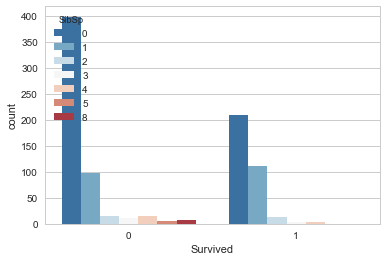

In [32]:
#Plot the Survived vs Pclass variables
sns.countplot(x='Survived',data=df_titanic_train_data,hue='SibSp',palette='RdBu_r')

<font color='blue'>

<b># of siblings / spouses aboard the Titanic is also having some impact to the survival chances. There are high number passengers with no siblings or spouses</b>

</font>

In [33]:
#Check the unique values of the column
df_titanic_train_data['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

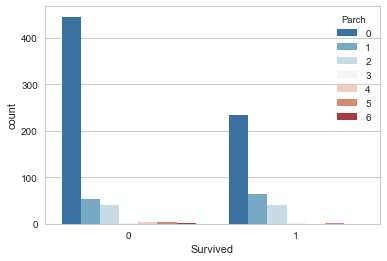

In [34]:
#Plot the Survived vs Pclass variables
sns.countplot(x='Survived',data=df_titanic_train_data,hue='Parch',palette='RdBu_r')

<font color='blue'>

<b># of parents / children aboard the Titanic is also having some impact to the survival chances. There are high number passengers with no parent or childern</b>

</font>

In [35]:
#Check the unique values of the column
df_titanic_train_data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [36]:
#Check the unique values of the column
df_titanic_train_data['Fare'].unique()

array([   7.25  ,   71.2833,    7.925 ,   53.1   ,    8.05  ,    8.4583,
         51.8625,   21.075 ,   11.1333,   30.0708,   16.7   ,   26.55  ,
         31.275 ,    7.8542,   16.    ,   29.125 ,   13.    ,   18.    ,
          7.225 ,   26.    ,    8.0292,   35.5   ,   31.3875,  263.    ,
          7.8792,    7.8958,   27.7208,  146.5208,    7.75  ,   10.5   ,
         82.1708,   52.    ,    7.2292,   11.2417,    9.475 ,   21.    ,
         41.5792,   15.5   ,   21.6792,   17.8   ,   39.6875,    7.8   ,
         76.7292,   61.9792,   27.75  ,   46.9   ,   80.    ,   83.475 ,
         27.9   ,   15.2458,    8.1583,    8.6625,   73.5   ,   14.4542,
         56.4958,    7.65  ,   29.    ,   12.475 ,    9.    ,    9.5   ,
          7.7875,   47.1   ,   15.85  ,   34.375 ,   61.175 ,   20.575 ,
         34.6542,   63.3583,   23.    ,   77.2875,    8.6542,    7.775 ,
         24.15  ,    9.825 ,   14.4583,  247.5208,    7.1417,   22.3583,
          6.975 ,    7.05  ,   14.5   ,   15.0458, 

In [37]:

#Check the unique values of the column. We need to convert this into dummies (0s and 1s)
df_titanic_train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

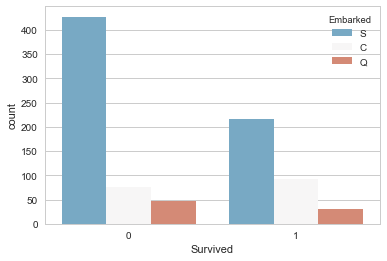

In [38]:
#plot the Survived vs Embarked
sns.countplot(x='Survived',data=df_titanic_train_data,hue='Embarked',palette='RdBu_r')

<font color='blue'>

<b>Embarked may not be a significant variable to determine the survival chance as this variable indicate passenger's embarked point. Hence we may not need to include this variable for our prediction</b>

</font>

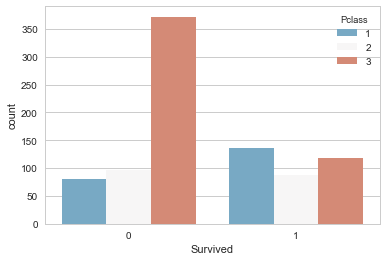

In [39]:
#Plot the Survived vs Pclass variables
sns.countplot(x='Survived',data=df_titanic_train_data,hue='Pclass',palette='RdBu_r')

<font color='blue'>

<b>We can see from the above graph that passengers travelled in Pclass 3 is having less chances for survival compare to other class. Hence it is one of the key contributing variable for determining survival chance for each passenger</b>

</font>

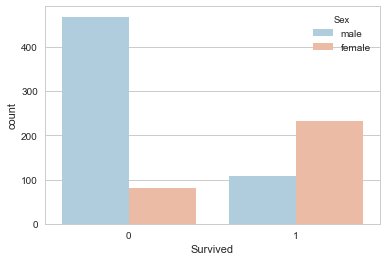

In [40]:
#Lets check Survived vs Sex
sns.countplot(x='Survived',data=df_titanic_train_data,hue='Sex',palette='RdBu_r')

<font color='blue'>

<b>We can see from the above graph that female passengers have high survival rate. Hence it is one of the key contributing variable for determining survival chance for each passenger</b>

</font>

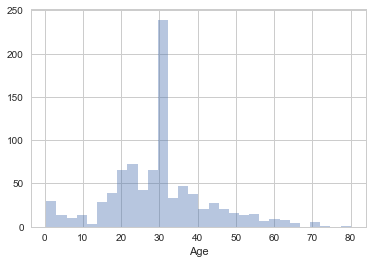

In [41]:
#Lets check the Age distribution
sns.distplot(df_titanic_train_data['Age'],bins=30,kde=False)

In [42]:
# Extract age and Survived columns in to new data frame
df_age_with_target = df_titanic_train_data.loc[:, ['Survived', 'Age']]

#Set the Age range
df_age_with_target['Age'] = pd.cut(df_age_with_target['Age'], bins=np.linspace(0, 70, num=11))
#Top 15 rows
df_age_with_target.head(15)

,Survived,Age
0,0,"(21.0, 28.0]"
1,1,"(35.0, 42.0]"
2,1,"(21.0, 28.0]"
3,1,"(28.0, 35.0]"
4,0,"(28.0, 35.0]"
5,0,"(28.0, 35.0]"
6,0,"(49.0, 56.0]"
7,0,"(0.0, 7.0]"
8,1,"(21.0, 28.0]"
9,1,"(7.0, 14.0]"


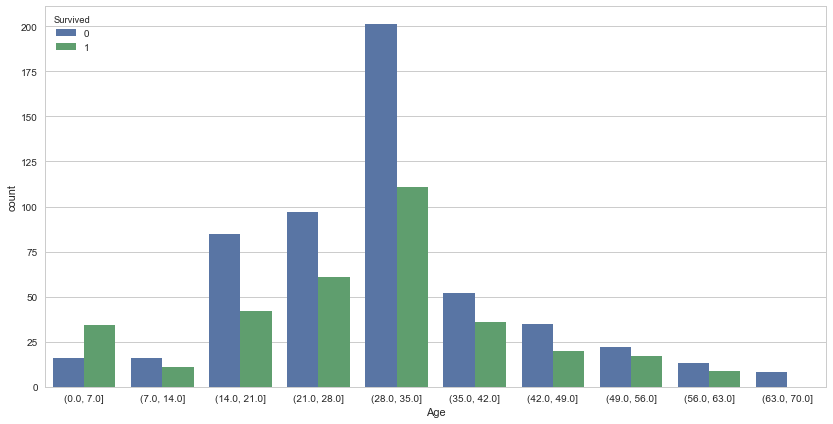

In [43]:
#Lets check the age distribution against Survived
plt.figure(figsize=(14,7))
sns.countplot('Age', data=df_age_with_target, hue='Survived')

<font color='blue'>

<b>We can see from the above graph that passengers within the age of 7 is having high survival rate. Hence it is one of the key contributing variable for determining survival chance for each passenger</b>

</font>

In [44]:
#Let us find out the data types of the columns from the leads data frame
df_titanic_train_data.dtypes.value_counts()

int64      5
object     4
float64    2
dtype: int64

In [45]:
df_titanic_train_data.shape

(891, 11)

In [46]:
#Copy original dataframe for later use
df_titanic_train_data_original = df_titanic_train_data.copy()

In [47]:
#Check the column types again
df_titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [48]:
#Remove colums that are not required for prediction
remove_cols = ['Name','Ticket']
df_titanic_train_data = df_titanic_train_data.drop(remove_cols, axis=1)


In [49]:
#Check the column types again
df_titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


### Step 3: Transforming variables for model building
### We need to tranform the variables using dummies to prepare the data for building model.
### Many of the variables are categorized or non-numberic. Hence it is important to perform this step

In [50]:
# Defining the map function
def binary_map(x):
    return x.map({"male": 1, "female": 0})

In [51]:
#Modify the column which has only two unique values
var_list = ['Sex']
df_titanic_train_data[var_list] = df_titanic_train_data[var_list].apply(binary_map)


In [52]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_titanic_train_data[['Embarked']],drop_first=True)

# Adding the results to the main dataframe
df_titanic_train_data = pd.concat([df_titanic_train_data, dummy1], axis=1)

In [53]:
#Checking the datatypes count
df_titanic_train_data.dtypes.value_counts()

int64      6
float64    2
uint8      2
object     1
dtype: int64

In [54]:
#Dropping original variables as they are transformed
df_titanic_train_data = df_titanic_train_data.drop(['Embarked'], axis = 1)

In [55]:
#Now checking the data types again. Now all of the columns are having types that are helpful for the prediction (numberic)
df_titanic_train_data.dtypes.value_counts()

int64      6
float64    2
uint8      2
dtype: int64

In [56]:
#Confirm that we do not have any object or non-numberic type
df_titanic_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked_Q     891 non-null uint8
Embarked_S     891 non-null uint8
dtypes: float64(2), int64(6), uint8(2)
memory usage: 57.5 KB


### Step 4: Building Logistic Regression Model
### i) Split the data into Train and Test
### ii) Scale the data using fit_transform
### iii) Check the correlation and stats
### iv) Perform Cross Validation
### v) Perform feature selection
### vi) Remove highly correlated variables
### vii) Check VIF and remove high VIF variables
### viii) fit the model
### ix) Predict the model


In [57]:
#Create X and y
from sklearn.model_selection import train_test_split
X = df_titanic_train_data.drop(['PassengerId','Survived'], axis=1)
y = df_titanic_train_data['Survived']

In [58]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

In [59]:
# Create standardizer
standardizer = StandardScaler()

In [60]:
# Create logistic regression
logit = LogisticRegression()

In [61]:
# Pipeline to standardize and execute logistic regression
pipeline = make_pipeline(standardizer, logit)

In [62]:
#Let us now create k-Fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

In [63]:
#Perform k-fold cross-validation
cv_results = cross_val_score(pipeline, # Pipeline created above
                             X, # Feature matrix for the features
                             y, # Target variable
                             cv=kf, # Using the Cross-validation technique, perform the validation
                             scoring="accuracy", # Loss function to find accuracy
                             n_jobs=-1)

In [64]:
#Mean value of the results
cv_results.mean()

0.80137328339575531

In [65]:
#Let us check KNN classifier algorithm and it's performance
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
metrics.accuracy_score(y, y_pred)

0.80920314253647585

In [66]:
# Let us split dataset of 25 observations into 5 folds
from sklearn.cross_validation import KFold
kf = KFold(25, n_folds=5, shuffle=False)

In [67]:
# print the contents of each training and testing set
# ^ - forces the field to be centered within the available space
# .format() - formats the string similar to %s or %n
# enumerate(sequence, start=0) - returns an enumerate object
print('{} {:^61} {}'.format('Iteration', 'Training set obsevations', 'Testing set observations'))
for iteration, data in enumerate(kf, start=1):
    print('{!s:^9} {} {!s:^25}'.format(iteration, data[0], data[1]))

Iteration                   Training set obsevations                    Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


In [68]:
#Perform KNN cross validation
from sklearn.cross_validation import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)

In [69]:
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[ 0.62222222  0.64444444  0.69662921  0.71910112  0.71910112  0.71910112
  0.71910112  0.71910112  0.65168539  0.77272727]


In [70]:
# use average accuracy as an estimate of out-of-sample accuracy
# numpy array has a method mean()
print(scores.mean())

0.698321416411


In [71]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())


print(k_scores)

[0.68704744069912604, 0.69602372034956306, 0.71853421859039845, 0.7028033140392691, 0.69832141641130407, 0.69258994438769739, 0.70618715242310748, 0.68935705368289635, 0.71407728975144702, 0.70276472591079342, 0.71174100556123032, 0.69943110884122117, 0.69940670752468503, 0.70728436045851772, 0.70843349222562702, 0.70953155146975377, 0.71850868232890708, 0.70845789354216326, 0.70169078424696407, 0.70737175122006568, 0.70508653955283174, 0.71073005334241279, 0.71408863920099885, 0.71071756894790605, 0.69948104641924869, 0.69722108727726706, 0.7006304619225967, 0.70622347066167301, 0.69950629894450123, 0.70739728748155717]


In [72]:
# in essence, this is basically running the k-fold cross-validation method 30 times because we want to run through K values from 1 to 30
# we should have 30 scores here
print('Length of list', len(k_scores))
print('Max of list', max(k_scores))

Length of list 30
Max of list 0.71853421859


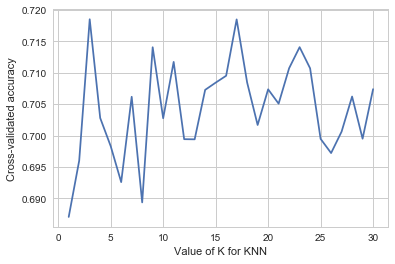

In [73]:
# plot how accuracy changes as we vary k

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')

In [74]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)

In [75]:
# Instead of saving 10 scores in object named score and calculating mean
# We're just calculating the mean directly on the results
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.70737175122


<font color='blue'>

<b>Based on the above cross validations performed for KNN and Logistic regression, we found logistic regression is having better performance</b>

</font>

Optimal number of features: 6
Selected features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_S']


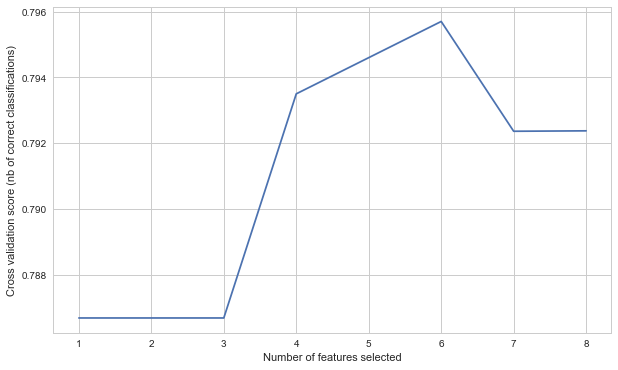

In [76]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

<font color='blue'>

<b>Based on the above graph 6 features are the best choice to build the model</b>

</font>

In [77]:
# Splitting the data into train and validation set
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [78]:
#Checking the X dataframe
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,3,1,22.0,1,0,7.2500,0,1
1,1,0,38.0,1,0,71.2833,0,0
2,3,0,26.0,0,0,7.9250,0,1
3,1,0,35.0,1,0,53.1000,0,1
4,3,1,35.0,0,0,8.0500,0,1
5,3,1,30.0,0,0,8.4583,1,0
6,1,1,54.0,0,0,51.8625,0,1
7,3,1,2.0,3,1,21.0750,0,1
8,3,0,27.0,0,2,11.1333,0,1
9,2,0,14.0,1,0,30.0708,0,0


In [79]:
#Using the standard scaler to standarize the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['Pclass','Age','SibSp','Parch']] = scaler.fit_transform(X_train[['Pclass','Age','SibSp','Parch']])

X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
69,0.843816,1,-0.315734,1.298708,-0.463118,8.6625,0,1
85,0.843816,0,0.230066,2.189781,-0.463118,15.8500,0,1
794,0.843816,1,-0.393705,-0.483440,-0.463118,7.8958,0,1
161,-0.345544,0,0.775865,-0.483440,-0.463118,15.7500,0,1
815,-1.534905,1,-0.003849,-0.483440,-0.463118,0.0000,0,1


In [80]:
y_train.head()

69     0
85     1
794    0
161    1
815    0
Name: Survived, dtype: int64

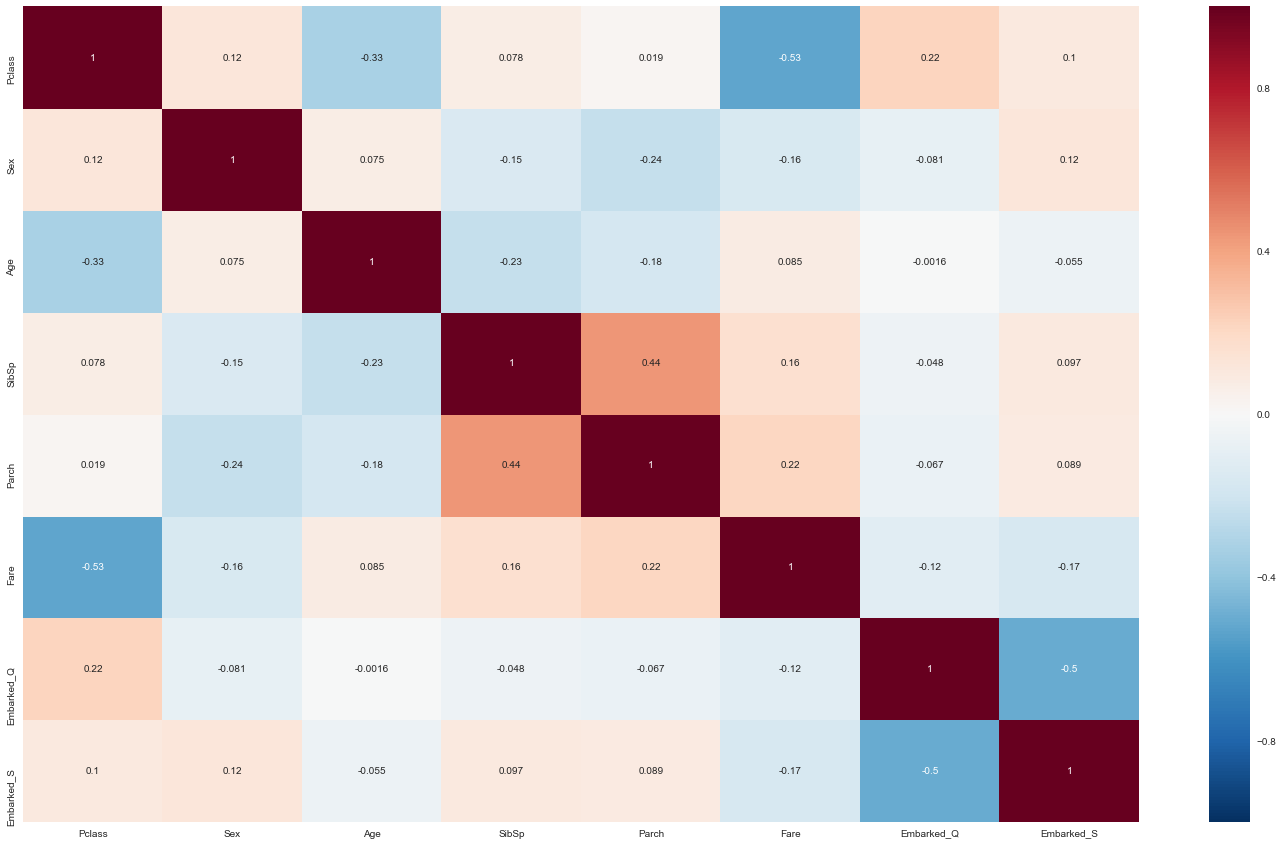

In [81]:
#Check the correlation
plt.figure(figsize = (25,15))        # Size of the figure
sns.heatmap(X_train.corr(),annot = True)
plt.show()

In [82]:
corr_matrix = X_train.corr().abs()

#check correlation between independent variables
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
print(sol)

Pclass      Fare          0.529167
Embarked_Q  Embarked_S    0.500712
SibSp       Parch         0.442460
Pclass      Age           0.327804
Sex         Parch         0.240891
Age         SibSp         0.234412
Pclass      Embarked_Q    0.220131
Parch       Fare          0.215695
Age         Parch         0.177564
Fare        Embarked_S    0.170098
Sex         Fare          0.161173
SibSp       Fare          0.156440
Sex         SibSp         0.151552
            Embarked_S    0.124433
Pclass      Sex           0.119498
Fare        Embarked_Q    0.116711
Pclass      Embarked_S    0.100302
SibSp       Embarked_S    0.097253
Parch       Embarked_S    0.088657
Age         Fare          0.084800
Sex         Embarked_Q    0.080592
Pclass      SibSp         0.077914
Sex         Age           0.074659
Parch       Embarked_Q    0.067273
Age         Embarked_S    0.055196
SibSp       Embarked_Q    0.047637
Pclass      Parch         0.018808
Age         Embarked_Q    0.001614
dtype: float64


<font color='blue'>

<b>There are many variables which are highly correlated to each other. This will cause multicollinearity. Let us perform statistical model to eliminate the variables </b>

</font>

In [83]:
# Using the Logistic regression model to fit and find the summary of the model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      614
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -268.83
Date:                Wed, 04 Sep 2019   Deviance:                       537.65
Time:                        15:35:54   Pearson chi2:                     640.
No. Iterations:                     5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4143      0.321      4.406      0.000       0.785       2.043
Pclass        -0.8936      0.144     -6.222      0.000      -1.175      -0.612
Sex           -2.8949      0.248    -11.665      0.000      -3.381      -2.408
Age           -0.5033      0.126     -4.009      0.000      -0.749      -0.257
SibSp         -0.3111      0.141     -2.210      0.027      -0.587      -0.035
Parch         -0.1984      0.122     -1.621      0.105      -0.438       0.042
Fare           0.0028      0.003      1.015      0.310      -0.003       0.008
Embarked_Q    -0.3822      0.471     -0.811      0.417      -1.306       0.541
Embarked_S    -0.4329      0.290     -1.490      0.136      -1.002       0.136
==============================================================================
"""

In [84]:
# Let us now use the RFE
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(X_train, y_train)

In [85]:
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

In [86]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Pclass', True, 1),
 ('Sex', True, 1),
 ('Age', True, 1),
 ('SibSp', True, 1),
 ('Parch', True, 1),
 ('Fare', True, 1),
 ('Embarked_Q', True, 1),
 ('Embarked_S', True, 1)]

In [87]:
col = X_train.columns[rfe.support_]
col

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [88]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [89]:
#Perform the logistic regression again with fit and summarize the model
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      614
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -268.83
Date:                Wed, 04 Sep 2019   Deviance:                       537.65
Time:                        15:35:54   Pearson chi2:                     640.
No. Iterations:                     5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4143      0.321      4.406      0.000       0.785       2.043
Pclass        -0.8936      0.144     -6.222      0.000      -1.175      -0.612
Sex           -2.8949      0.248    -11.665      0.000      -3.381      -2.408
Age           -0.5033      0.126     -4.009      0.000      -0.749      -0.257
SibSp         -0.3111      0.141     -2.210      0.027      -0.587      -0.035
Parch         -0.1984      0.122     -1.621      0.105      -0.438       0.042
Fare           0.0028      0.003      1.015      0.310      -0.003       0.008
Embarked_Q    -0.3822      0.471     -0.811      0.417      -1.306       0.541
Embarked_S    -0.4329      0.290     -1.490      0.136      -1.002       0.136
==============================================================================
"""

<font color='blue'>

<b>We will remove Parch and Fare as they have high P value. We will keep Embarked Q and S variable</b>

</font>

In [90]:
#Dropping variables from the model
col1 = col.drop(['Parch','Fare'],1)

In [91]:
#New list of variables for re-fitting the model
col1

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Embarked_Q', 'Embarked_S'], dtype='object')

In [92]:
#Re-fit the model using the new variable set
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      616
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -270.48
Date:                Wed, 04 Sep 2019   Deviance:                       540.96
Time:                        15:35:54   Pearson chi2:                     651.
No. Iterations:                     5                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4805      0.293      5.055      0.000       0.906       2.055
Pclass        -0.9619      0.127     -7.570      0.000      -1.211      -0.713
Sex           -2.8144      0.240    -11.739      0.000      -3.284      -2.345
Age           -0.4949      0.123     -4.008      0.000      -0.737      -0.253
SibSp         -0.3571      0.133     -2.684      0.007      -0.618      -0.096
Embarked_Q    -0.3665      0.466     -0.787      0.431      -1.279       0.546
Embarked_S    -0.4906      0.283     -1.735      0.083      -1.045       0.064
==============================================================================
"""

In [93]:
# VIF is important to find the independent variables and it's impact to the model 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# We can now check the VIF using a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Sex,2.38
5,Embarked_S,2.28
2,Age,1.19
0,Pclass,1.18
4,Embarked_Q,1.13
3,SibSp,1.09


<font color='blue'>

<b>From the above, we can see that the VIF is within acceptable range</b>

</font>

In [95]:
# Let us now check the predicted values of the training set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

69     0.050028
85     0.327889
794    0.093740
161    0.752296
815    0.456719
516    0.792889
299    0.913705
454    0.078583
59     0.034903
879    0.893613
dtype: float64

In [96]:
#Array conversion with reshaping
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([ 0.05002845,  0.3278893 ,  0.09373988,  0.75229556,  0.45671894,
        0.79288949,  0.91370466,  0.07858344,  0.03490265,  0.89361339])

In [97]:
#Make the y_train data into dataframe with converted and probability of conversion
y_train_pred_final = pd.DataFrame({'Survived':y_train.values, 'Survived_prob':y_train_pred})
y_train_pred_final['PassengerId'] = y_train.index
y_train_pred_final.head()

,Survived,Survived_prob,PassengerId
0,0,0.050028,69
1,1,0.327889,85
2,0,0.093740,794
3,1,0.752296,161
4,0,0.456719,815


In [98]:
#Let us use the standard cut-off of 0.5 to the logistic model
y_train_pred_final['predicted'] = y_train_pred_final.Survived_prob.map(lambda x: 1 if x > 0.5 else 0)

#Check the dataframe with predicted variable against prospects
y_train_pred_final.head()

,Survived,Survived_prob,PassengerId,predicted
0,0,0.050028,69,0
1,1,0.327889,85,0
2,0,0.093740,794,0
3,1,0.752296,161,1
4,0,0.456719,815,0


In [99]:
# Define the Confusion matrix  and print the same
confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
print(confusion)

[[333  57]
 [ 67 166]]


In [100]:
# Based on the predictions, we will check the accuracy of the model and print the same
print(metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.predicted))

0.800963081862


In [101]:
# VIF is important to find the independent variables and it's impact to the model 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [103]:
#Let's see the sensitivity of our logistic regression model
#0.5
TP / float(TP+FN)

0.71244635193133043

In [104]:
# Let us calculate specificity
#0.5
TN / float(TN+FP)

0.85384615384615381

In [105]:
# Let us find false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.146153846154


In [106]:
# Let's print the positive predicting value 
print (TP / float(TP+FP))

0.744394618834


In [107]:
# Let us now find the Negative predicting value
print (TN / float(TN+ FN))

0.8325


In [108]:
#Define the ROC curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [109]:
#define metrics for the roc curve
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Survived, y_train_pred_final.Survived_prob, drop_intermediate = False )

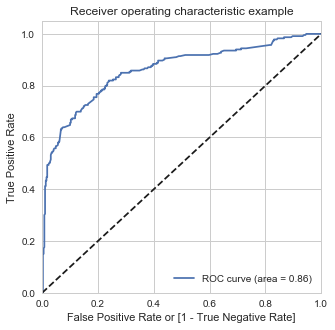

In [110]:
#Plot the ROC Curve
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survived_prob)

In [111]:
# We will now Check probablity using new columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Survived_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Survived,Survived_prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.050028,69,0,1,0,0,0,0,0,0,0,0,0
1,1,0.327889,85,0,1,1,1,1,0,0,0,0,0,0
2,0,0.093740,794,0,1,0,0,0,0,0,0,0,0,0
3,1,0.752296,161,1,1,1,1,1,1,1,1,1,0,0
4,0,0.456719,815,0,1,1,1,1,1,0,0,0,0,0


In [112]:
# Using the accuracy, sensitivity and specificity , we will find various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.373997  1.000000  0.000000
0.1   0.1  0.595506  0.918455  0.402564
0.2   0.2  0.717496  0.866953  0.628205
0.3   0.3  0.772071  0.832618  0.735897
0.4   0.4  0.789727  0.763948  0.805128
0.5   0.5  0.800963  0.712446  0.853846
0.6   0.6  0.817014  0.639485  0.923077
0.7   0.7  0.797753  0.497854  0.976923
0.8   0.8  0.767255  0.394850  0.989744
0.9   0.9  0.693419  0.193133  0.992308


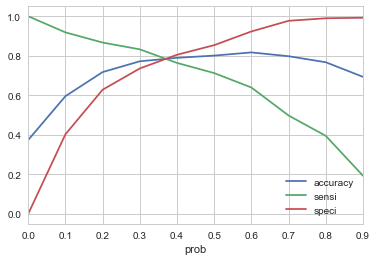

In [113]:
# We will now plot a graph based on accuracy,sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [114]:
#From the curve above, 0.3 is the optimum point to take it as a cutoff probability.
#We will set the cut-off to 0.3 so that we will have high sensitivity to get more leads to be identified for sales people

y_train_pred_final['final_predicted'] = y_train_pred_final.Survived_prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Survived,Survived_prob,PassengerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.050028,69,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.327889,85,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.093740,794,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.752296,161,1,1,1,1,1,1,1,1,1,0,0,1
4,0,0.456719,815,0,1,1,1,1,1,0,0,0,0,0,1


<font color='blue'>

<b>Using the 0.4 cut-off we have obtained optimum Survived predictions<br>

</b>


</font>

In [115]:
#Let us find the Converted counts from the training set
y_train_pred_final['Survived'].value_counts()

0    390
1    233
Name: Survived, dtype: int64

In [116]:
#Let us now find the predicted variable which can tell us how close it is to the Converted variable
y_train_pred_final['final_predicted'].value_counts()

0    369
1    254
Name: final_predicted, dtype: int64

In [117]:
#Here is the precision calculation
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.74439461883408076

In [118]:
# We can now check the accuracy of the final model
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [119]:
#Here is the sensitivity of the model
#0.4
TP / float(TP+FN)

0.76394849785407726

In [120]:
#Here is Specificity of the model
#0.4
TN / float(TN+FP)

0.80512820512820515

In [121]:
# Let us now calculate false postive rate - predicting Converted when prospect does not have converted
print(FP/ float(TN+FP))

0.194871794872


In [122]:
# Here is the positive predictive value 
print (TP / float(TP+FP))

0.700787401575


In [123]:
# Here is the negative predictive value
print (TN / float(TN+ FN))

0.850948509485


In [124]:
#Let us now check the confusion matrix based on the above

confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
confusion

array([[333,  57],
       [ 67, 166]])

In [125]:
#Recall calculation based on the above calculations
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.71244635193133043

In [126]:
from sklearn.metrics import precision_score, recall_score

In [127]:
#Let us find the precision score
precision_score(y_train_pred_final.Survived , y_train_pred_final.predicted)

0.74439461883408076

In [128]:
#Let us now calculate recall score
recall_score(y_train_pred_final.Survived, y_train_pred_final.predicted)

0.71244635193133043

In [129]:
from sklearn.metrics import precision_recall_curve

In [130]:
y_train_pred_final.Survived, y_train_pred_final.predicted

(0      0
 1      1
 2      0
 3      1
 4      0
 5      1
 6      1
 7      0
 8      0
 9      1
 10     0
 11     0
 12     0
 13     0
 14     1
 15     0
 16     1
 17     0
 18     1
 19     1
 20     1
 21     0
 22     0
 23     1
 24     1
 25     1
 26     1
 27     0
 28     1
 29     0
       ..
 593    1
 594    0
 595    0
 596    1
 597    0
 598    0
 599    0
 600    0
 601    0
 602    1
 603    1
 604    1
 605    1
 606    0
 607    0
 608    0
 609    0
 610    1
 611    1
 612    0
 613    0
 614    1
 615    1
 616    0
 617    1
 618    1
 619    1
 620    1
 621    0
 622    1
 Name: Survived, Length: 623, dtype: int64, 0      0
 1      0
 2      0
 3      1
 4      0
 5      1
 6      1
 7      0
 8      0
 9      1
 10     0
 11     0
 12     1
 13     0
 14     1
 15     0
 16     1
 17     0
 18     1
 19     0
 20     0
 21     0
 22     0
 23     0
 24     1
 25     0
 26     0
 27     0
 28     0
 29     0
       ..
 593    1
 594    0
 595    0
 596   

In [131]:
#p,r and thresholds
p, r, thresholds = precision_recall_curve(y_train_pred_final.Survived, y_train_pred_final.Survived_prob)

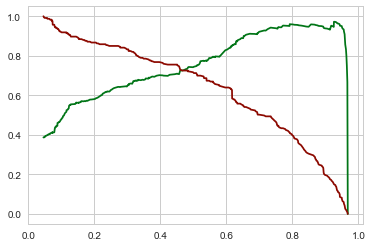

In [132]:
#Threshold plot
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [133]:
#Let us check the columns
X_validation.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')

In [134]:
#scale and transform the variables
X_validation[['Pclass','Age','SibSp']] = scaler.fit_transform(X_validation[['Pclass','Age','SibSp']])

X_validation.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
205,0.789963,0,-2.027547,-0.453798,1,10.4625,0,1
44,0.789963,0,-0.754887,-0.453798,0,7.8792,1,0
821,0.789963,1,-0.155988,-0.453798,0,8.6625,0,1
458,-0.426762,0,1.565847,-0.453798,0,10.5000,0,1
795,-0.426762,1,0.742361,-0.453798,0,13.0000,0,1


Optimal number of features: 6
Selected features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_S']


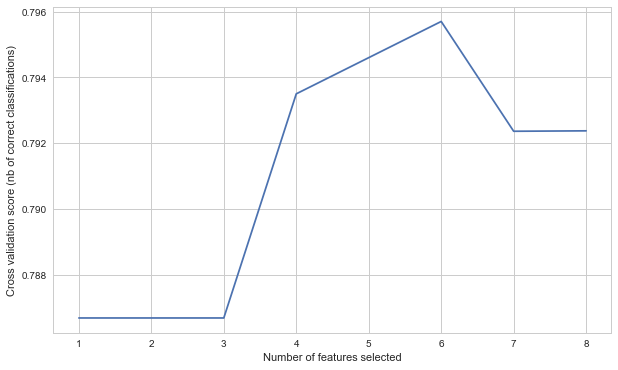

In [135]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [136]:
#Based on final variables, we will be performing prediction on the test set
X_validation = X_validation[col1]
X_validation.head()

,Pclass,Sex,Age,SibSp,Embarked_Q,Embarked_S
205,0.789963,0,-2.027547,-0.453798,0,1
44,0.789963,0,-0.754887,-0.453798,1,0
821,0.789963,1,-0.155988,-0.453798,0,1
458,-0.426762,0,1.565847,-0.453798,0,1
795,-0.426762,1,0.742361,-0.453798,0,1


In [137]:
#Add constant using test dataset
X_validation_sm = sm.add_constant(X_validation)

<font color='blue'>

<b>predict the validation set using the model built earlier using the validation set</b>

</font>

In [138]:
#Predict the Conversion based on the model built earlier
y_validation_pred = res.predict(X_validation_sm)

In [139]:
y_validation_pred[:10]

205    0.801466
44     0.708842
821    0.087445
458    0.687284
795    0.165284
118    0.645060
424    0.086979
678    0.386292
269    0.925092
229    0.340762
dtype: float64

In [140]:
#Let us create a dataframe using the test pred
y_pred_1 = pd.DataFrame(y_validation_pred)

In [141]:
#Here is the created dataframe
y_pred_1.head()

,0
205,0.801466
44,0.708842
821,0.087445
458,0.687284
795,0.165284


In [142]:
#Making the dataframe using the test set
y_validation_df = pd.DataFrame(y_validation)

In [143]:
#Adding Prospect ID to the dataframe
y_validation_df['PassengerId '] = y_validation_df.index

In [144]:
#Resetting the index
y_pred_1.reset_index(drop=True, inplace=True)
y_validation_df.reset_index(drop=True, inplace=True)

In [145]:
#Now concat the dataframes
y_pred_final = pd.concat([y_validation_df, y_pred_1],axis=1)

In [146]:
y_pred_final.head()

,Survived,PassengerId,0
0,0,205,0.801466
1,1,44,0.708842
2,1,821,0.087445
3,1,458,0.687284
4,0,795,0.165284


In [147]:
#Let us now rename the column name
y_pred_final= y_pred_final.rename(columns={ 0 : 'Survived_prob'})

In [148]:
y_pred_final.head()

,Survived,PassengerId,Survived_prob
0,0,205,0.801466
1,1,44,0.708842
2,1,821,0.087445
3,1,458,0.687284
4,0,795,0.165284


In [149]:
#Let us now try with the cut-off of 0.3 as we did for training data
y_pred_final['final_predicted'] = y_pred_final.Survived_prob.map(lambda x: 1 if x > 0.4 else 0)

In [150]:
#Examine the dataframe
y_pred_final.head()

,Survived,PassengerId,Survived_prob,final_predicted
0,0,205,0.801466,1
1,1,44,0.708842,1
2,1,821,0.087445,0
3,1,458,0.687284,1
4,0,795,0.165284,0


In [151]:
#Find the confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Survived.round(), y_pred_final.final_predicted.round() )
confusion2

array([[131,  28],
       [ 28,  81]])

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
#Sensitivity of the model we built
#0.4 Validation
TP / float(TP+FN)

0.74311926605504586

In [154]:
#Specificity of the model we built
#0.4 Validation
TN / float(TN+FP)

0.82389937106918243

In [155]:
from sklearn.metrics import precision_score, recall_score

In [156]:
#Finally we will check the precision of the model
precision_score(y_pred_final.Survived , y_pred_final.final_predicted)

0.74311926605504586

<font color='blue'>

<b>From the above we can see that the model is having high precision,sensitivity and specificity</b>

</font>

In [157]:
df_titanic_test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [158]:
X_test = df_titanic_test_data.drop(['PassengerId','Name','Parch','Ticket','Fare'], axis=1)

In [159]:
# Defining the map function
def binary_map(x):
    return x.map({"male": 1, "female": 0})

In [160]:
var_list = ['Sex']
X_test[var_list] = X_test[var_list].apply(binary_map)

In [161]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(X_test[['Embarked']],drop_first=True)

In [162]:
# Adding the results to the Leads dataframe
X_test = pd.concat([X_test, dummy1], axis=1)

In [163]:
#Dropping original variables as they are transformed
X_test = X_test.drop(['Embarked'], axis = 1)

In [164]:
#Using the standard scaler to standarize the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_test[['Pclass','Age','SibSp','Sex']] = scaler.fit_transform(X_test[['Pclass','Age','SibSp','Sex']])

In [165]:
X_test.head()

,Pclass,Sex,Age,SibSp,Embarked_Q,Embarked_S
0,0.873482,0.755929,0.339424,-0.499470,1,0
1,0.873482,-1.322876,1.329924,0.616992,0,1
2,-0.315819,0.755929,2.518523,-0.499470,1,0
3,0.873482,0.755929,-0.254876,-0.499470,0,1
4,0.873482,-1.322876,-0.651076,0.616992,0,1


<font color='blue'>

<b>Variables are transformed now</b>

</font>

In [166]:
#Add constant using test dataset
X_test_sm = sm.add_constant(X_test)

<font color='blue'>

<b>Predict Survived using the model developed above using the test dataset</b>

</font>

In [167]:
#Predict the Conversion based on the model built earlier
y_test_pred = res.predict(X_test_sm)

In [168]:
y_test_pred[:10]

0    0.136652
1    0.952312
2    0.144572
3    0.157971
4    0.981561
5    0.238019
6    0.984988
7    0.291345
8    0.993445
9    0.096605
dtype: float64

In [169]:
#Let us create a dataframe using the test pred
y_pred_1 = pd.DataFrame(y_test_pred)
#Here is the created dataframe
y_pred_1.head()

,0
0,0.136652
1,0.952312
2,0.144572
3,0.157971
4,0.981561


In [170]:
#Adding Prospect ID to the dataframe
y_pred_1['PassengerId'] = df_titanic_test_data['PassengerId']
y_pred_1['Name'] = df_titanic_test_data['Name']
y_pred_1['Sex'] = df_titanic_test_data['Sex']

In [171]:
y_pred_1.reset_index(drop=True, inplace=True)

In [172]:
y_pred_final= y_pred_1.rename(columns={ 0 : 'Survived_prob'})

In [173]:
y_pred_final['Predicted'] = y_pred_final.Survived_prob.map(lambda x: 1 if x > 0.4 else 0)

In [174]:
y_pred_final.head()

,Survived_prob,PassengerId,Name,Sex,Predicted
0,0.136652,892,"Kelly, Mr. James",male,0
1,0.952312,893,"Wilkes, Mrs. James (Ellen Needs)",female,1
2,0.144572,894,"Myles, Mr. Thomas Francis",male,0
3,0.157971,895,"Wirz, Mr. Albert",male,0
4,0.981561,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1


In [175]:
df_final_data = y_pred_final.copy()
to_cols = ['PassengerId','Predicted']
df_final_data = df_final_data[to_cols]
df_final_data.rename(columns={'Predicted': 'Survived'}, inplace=True)
df_final_data.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [176]:
#write the result to the CSV file
df_final_data.to_csv('submission.csv',index=False)

<font color='blue'>

<b>The result is written to the CSV file</b>

</font>

## The End